# Total Variation and Image Processing
##### Sean Wade

In [51]:
from __future__ import division
import numpy as np
from numpy.linalg import norm
from numpy.random import random_integers, uniform, randn
from scipy.misc import imread, imsave

from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://seanwade.com/jupyter.css').read())

## Problem 1

In [49]:
def p1(x_steps, final_T, time_steps):
    a, b = -1, 1.
    alpha, beta = 1., 7.
    #### Define variables x_steps, final_T, time_steps ####
    delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
    x0 = np.linspace(a,b,x_steps+1)


    # Check a stability condition for this numerical method
    if delta_t/delta_x**2. > .5:
        print "stability condition fails"

    u = np.empty((2,x_steps+1))
    u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
    u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha
    
    plt.plot(x0, u[1], label='Initial Guess')


    def rhs(y):
        # Approximate first and second derivatives to second order accuracy.
        yp = (np.roll(y,-1) - np.roll(y,1))/(2.*delta_x)
        ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/delta_x**2.
        # Find approximation for the next time step, using a first order Euler step
        y[1:-1] -= delta_t*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])

    # Time step until successive iterations are close
    iteration = 0
    while iteration < time_steps:
        rhs(u[1])
        if norm(np.abs((u[0] - u[1]))) < 1e-5: break
        u[0] = u[1]
        iteration+=1
        
    plt.plot(x0, u[0], label='Minimized Curve')
      
    plt.legend(loc='best')
    plt.show()

    print "Difference in iterations is ", norm(np.abs((u[0] - u[1])))
    print "Final time = ", iteration*delta_t

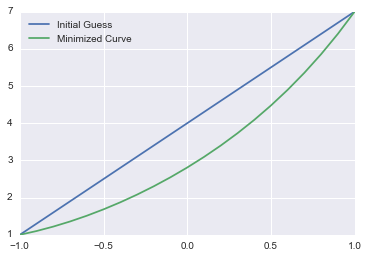

Difference in iterations is  0.0
Final time =  0.2


In [50]:
p1(20, .2, 250)

In [ ]:
1e-3 * 250

## Problem 2

In [58]:
imagename = 'balloons_resized_bw.jpg'
changed_pixels=40000
IM = imread(imagename, flatten=True) * (1. / 255)
IM_x, IM_y = IM.shape

for lost in xrange(changed_pixels):
    x_,y_ = random_integers(1,IM_x-2), random_integers(1,IM_y-2)
    val = .1*randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
imsave(name=("noised_"+imagename),arr=IM)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 798 + 1) instead
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 598 + 1) instead


Difference in iterations is  188.118894137
Final time =  0.25


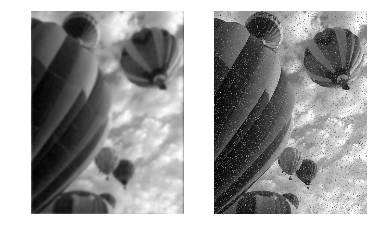

In [69]:
x_steps, final_T, time_steps = 20, .2, 250

delta_x = 1
delta_y = 1
lamb = 40
delta_t = 1e-3

u = imread('noised_balloons_resized_bw.jpg')
f = u.copy()

def rhs(u):
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_t = -(u - f - lamb*(u_xx + u_yy))
    return u_t * delta_t + u
    

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    u_copy = u.copy()
    u = rhs(u)
    if norm(np.abs((u_copy - u))) < 1e-5: break
    iteration+=1

plt.subplot(121)     
plt.imshow(u,cmap=cm.gray)
plt.axis('off')
plt.subplot(122)
plt.imshow(imread('noised_balloons_resized_bw.jpg'),cmap=cm.gray)
plt.axis('off')
plt.plot()
print "Difference in iterations is ", norm(np.abs((u[0] - u[1])))
print "Final time = ", iteration*delta_t

## Probelm 3

Final time =  0.2


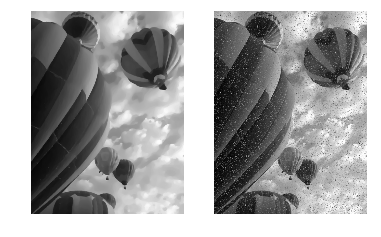

In [86]:
x_steps, final_T, time_steps = 20, .2, 200

delta_x = 1
delta_y = 1
lamb = 1.
delta_t = 1e-3
eps = 1e-6

u = imread('noised_balloons_resized_bw.jpg', flatten=True) * (1./255)
f = u.copy()

def rhs(u):
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2
    u_t = -lamb * (u - f) + (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_x*u_y*u_xy)/(u_x**2 + u_y**2 + eps)**(3./2)
    return u_t * delta_t + u
    

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    u_copy = u.copy()
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2
    u_t = -lamb * (u - f) + (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_x*u_y*u_xy)/(u_x**2 + u_y**2 + eps)**(3./2)
    u = u_t * delta_t + u
    #if norm(np.abs((u_copy - u))) < 1e-5: break
    iteration+=1

plt.subplot(121)     
plt.imshow(u,cmap=cm.gray)
plt.axis('off')
plt.subplot(122)
plt.imshow(imread('noised_balloons_resized_bw.jpg'),cmap=cm.gray)
plt.axis('off')
plt.plot()
print "Final time = ", iteration*delta_t